In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.cluster as cluster
from sklearn.preprocessing import StandardScaler

In [4]:
data = pd.read_csv('customer_data_records.csv')
print(data.head())

   CustomerID  Annual Income (k$)  Spending Score (1-100)
0           1                 117                      20
1           2                 107                      59
2           3                  29                      36
3           4                 121                      19
4           5                  86                      90


In [7]:
# Extract relevant features
X = data.iloc[:, [1,2]].values #select columns 1 and 2 as Annual income and spending score for all rows 


In [8]:
# Feature scaling - it is important to scale features before clustering
scaler = StandardScaler() # create  a standardScaler object
X_scaled = scaler.fit_transform(X) # fit and transform the data 
print(X_scaled[:5])

[[ 0.78764822 -0.97306487]
 [ 0.5399959   0.35288256]
 [-1.39169213 -0.42908644]
 [ 0.88670914 -1.00706352]
 [ 0.01992605  1.40684078]]


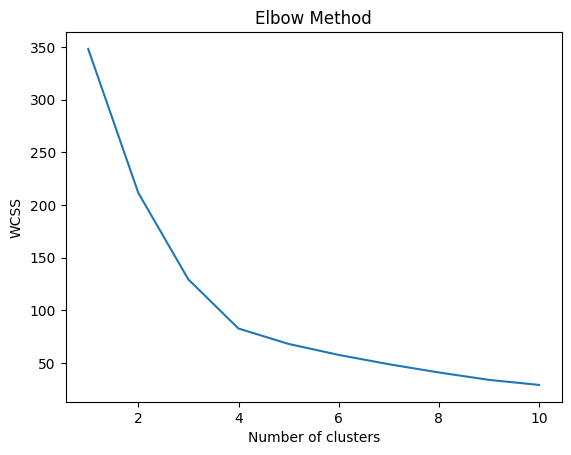

In [9]:
# Elbow method to find the optimal number of clusters
wcss = [] # list to store the within-cluster sum of squares for each cluster
for i in range(1, 11):
    kmeans = cluster.KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [10]:
# Based on the elbow method, lets assume the optimal cluster is 5
optimal_clusters = 5 # lets say we determined 5 clusters from the elbow method

# Perform k-means clustering with the optimal number of clusters
kmeans = cluster.KMeans(n_clusters=optimal_clusters, random_state=42)
y_means = kmeans.fit_predict(X_scaled) # predict the cluster labels for the scaled data


In [ ]:
# Add cluster labels to the original data
data['Cluster'] = y_means  # create new column cluster in the dataframe

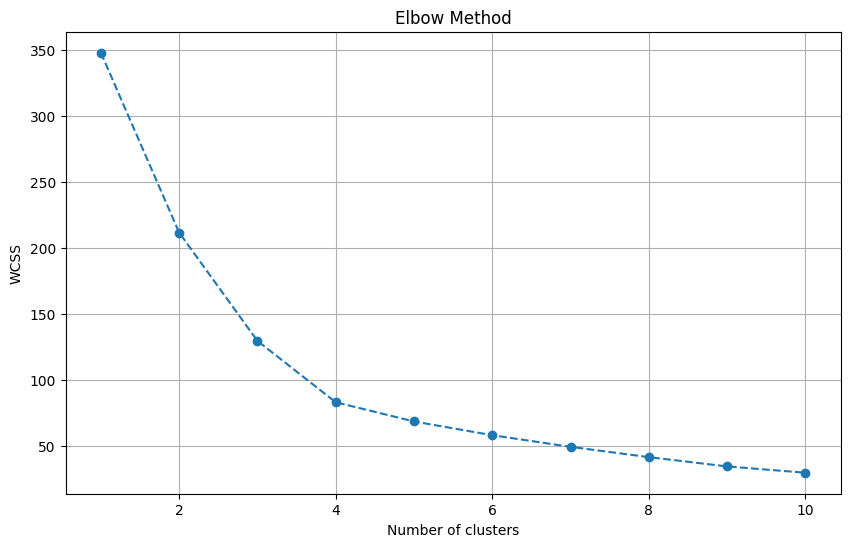

In [13]:
# plot the elbow method graph
plt.figure(figsize=(10,6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()